<a href="https://colab.research.google.com/github/gvanzyll/tdf-winner-analysis/blob/main/Tour_de_France_Winner_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas as numpy
import pandas as pd
import numpy as np

In [ ]:
#import dataset from local comp pt. 1
from google.colab import files
uploaded = files.upload()

Saving tdf_winners.csv to tdf_winners.csv


In [ ]:
#import dataset from local comp pt. 2
import io
tdf_winners = pd.read_csv(io.BytesIO(uploaded['tdf_winners.csv']))
#print first 5 rows and explore data
tdf_winners.head()


,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [ ]:
#drop the columns that we're not interested for this analysis. Ex: 'birth_town'
tdf_winners.drop(columns = ['winner_team', 'born', 'died', 'full_name', 'nickname', 'birth_town', 'birth_country'], inplace=True)
tdf_winners.head()

,edition,start_date,winner_name,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,nationality
0,1,1903-07-01,Maurice Garin,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,France
1,2,1904-07-02,Henri Cornet,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,France
2,3,1905-07-09,Louis Trousselier,2994.0,NaN,NaN,5,10,NaN,NaN,24,France
3,4,1906-07-04,René Pottier,4637.0,NaN,NaN,5,12,NaN,NaN,27,France
4,5,1907-07-08,Lucien Petit-Breton,4488.0,NaN,NaN,2,5,NaN,NaN,24,France


In [ ]:
#I see some missing values for height & weight. Let's see how many null values in the dataset.
tdf_winners.isnull().sum()

edition          0
start_date       0
winner_name      0
distance         0
time_overall     8
time_margin      8
stage_wins       0
stages_led       0
height          40
weight          39
age              0
nationality      0
dtype: int64

In [ ]:
#Remove any row with missing data. 
#Time, height, and age are all cruicial to the analysis.
tdf_winners.dropna(axis=0, how='any', inplace=True)

In [ ]:
#confirm success of last command
tdf_winners.isnull().sum()

edition         0
start_date      0
winner_name     0
distance        0
time_overall    0
time_margin     0
stage_wins      0
stages_led      0
height          0
weight          0
age             0
nationality     0
dtype: int64

In [ ]:
#Make a list of datetime info using 'start_date' column 
tdf_date_time = pd.to_datetime(tdf_winners['start_date'])

In [ ]:
#insert new 'year' column using datetime list
tdf_winners.insert(2, 'year', tdf_date_time.dt.year)

In [ ]:
#drop start_date columns
tdf_winners.drop(columns = 'start_date', inplace=True)

In [ ]:
#change time_margin from hours to minutes & rename column
tdf_winners['time_margin'] = tdf_winners['time_margin']*60
tdf_winners = tdf_winners.rename(columns={'time_margin': 'win_margin_min'})

In [ ]:
#looks like we have pretty consistent data starting in 1947! 
#make a final data set excluding the first two rows 
tdf_final = tdf_winners.iloc[2:,:]
tdf_final.tail()

,edition,year,winner_name,distance,time_overall,win_margin_min,stage_wins,stages_led,height,weight,age,nationality
101,102,2015,Chris Froome,3360.3,84.770556,1.016667,1,16,1.86,69.0,30,Great Britain
102,103,2016,Chris Froome,3529.0,89.080000,4.066667,2,14,1.86,69.0,31,Great Britain
103,104,2017,Chris Froome,3540.0,86.348611,0.900000,0,15,1.86,69.0,32,Great Britain
104,105,2018,Geraint Thomas,3349.0,83.286944,1.016667,2,11,1.83,71.0,32,Great Britain
105,106,2019,Egan Bernal,3349.0,82.950000,1.016667,0,2,1.75,60.0,22,Colombia


Let the analysis begin!

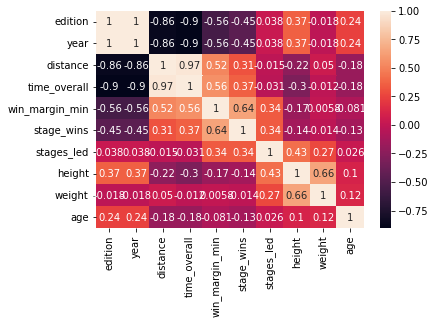

In [ ]:
#create a heatmap to see if any correlation coefficients jump out
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(tdf_final.corr(), annot=True);

Do height & weight have anything to do with margin of victory? 

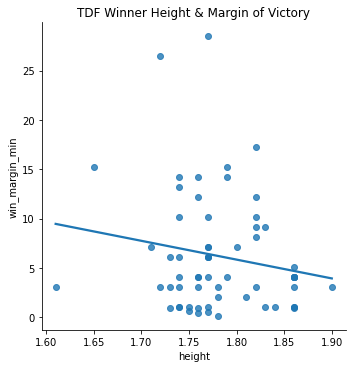

In [ ]:
#create a line plot between height (indep) & win_margin (dependent)to visualize the relationship 
sns.lmplot(x='height', y='win_margin_min', data=tdf_final,ci=None);

ax = plt.gca()
ax.set_title("TDF Winner Height & Margin of Victory");


It looks like there's a slight negative correlation- meaning that the taller a TDF winner is, the narrower their margin of victory. Let's see if it's statistically significant using a 95% confidence interval. 

Null Hypothesis: Height and Margin of Victory are unrelated. 

Ho: $\beta_1$ = 0

Alternative Hypothesis: Height and Margin of Victory are related.

Ha: $\beta_1 \neq$ 0

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

model_height = ols('win_margin_min ~ height', data = tdf_final).fit()
print(model_height.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:         win_margin_min   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.905
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.173
Time:                        18:12:36   Log-Likelihood:                -200.07
No. Observations:                  63   AIC:                             404.1
Df Residuals:                      61   BIC:                             408.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.1489     24.630      1.630      0.1

Our $R^2$ value of .030 indicates that only 3% of the variability in margin of victory can be explained by changes in height. Furthermore, our p-value of .173 is above our 95% alpha value of .05. 

**Therefore, we fail to reject the null hypothesis and conclude that height does not play a statistically significant role in a TdF Winner's margin of victory.**

Next, let's look at weight.

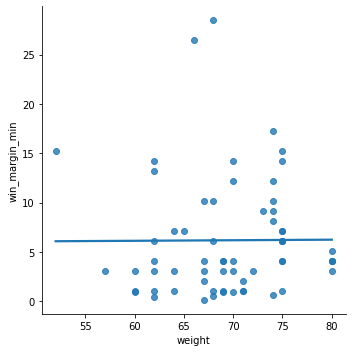

In [ ]:
sns.lmplot(x='weight', y='win_margin_min', data=tdf_final,ci=None);

Wow! I don't think this warrants running a statistical model, but I'll run one for practice! 

Using a 95% confidence interval:

Null Hypothesis: Weight and Margin of Victory are unrelated. 

Ho: $\beta_1$ = 0

Alternative Hypothesis: Weight and Margin of Victory are related.

Ha: $\beta_1 \neq$ 0

In [ ]:
model_weight = ols('win_margin_min ~ weight', data = tdf_final).fit()
print(model_weight.summary())

                            OLS Regression Results                            
Dep. Variable:         win_margin_min   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                  0.002040
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.964
Time:                        18:12:36   Log-Likelihood:                -201.04
No. Observations:                  63   AIC:                             406.1
Df Residuals:                      61   BIC:                             410.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7805      8.688      0.665      0.5

I've never seen an $R^2$ value so low and a p-value so high! 

Again, we fail to reject the null and conclude that weight and margin of victory are NOT statistically significant. 

What about age? 

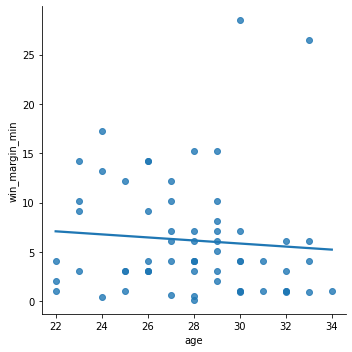

In [ ]:
sns.lmplot(x='age', y='win_margin_min', data=tdf_final, ci=None);

Nope! 

Distance must correlate to margin of victory, right? The longer the race, the more time a winner has to build a sizeable lead? Sounds plausible. Let's investigate. 

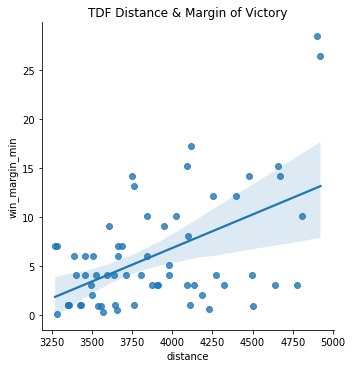

In [ ]:
sns.lmplot(x='distance', y='win_margin_min', data=tdf_final, ci=95);


ax = plt.gca()
ax.set_title("TDF Distance & Margin of Victory");

Looks promising! We even have a few outliers. I'll leave them in for now. 

Using a 95% confidence interval:

Null Hypothesis: Distance and Margin of Victory are unrelated. 

Ho: $\beta_1$ = 0

Alternative Hypothesis: Distance and Margin of Victory are related.

Ha: $\beta_1 \neq$ 0

In [ ]:
model_distance = ols('win_margin_min ~ distance', data = tdf_final).fit()
print(model_distance.summary())

                            OLS Regression Results                            
Dep. Variable:         win_margin_min   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.58
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.27e-05
Time:                        18:12:37   Log-Likelihood:                -191.12
No. Observations:                  63   AIC:                             386.2
Df Residuals:                      61   BIC:                             390.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.5191      5.654     -3.629      0.0

Finally! We found something (albiet obvious).

We now have a model for predicting the margin of victory in minutes given a TdF distance. 

$\hat{y}$ = -20.5191 + (.0068*Distance)

Our intercept of -20.5191 isn't of much significant since a TdF will never be 0km, but our slope of .0068 indicates that we can expect an .0068 minute (or .408 second) increase in the margin of victory for a Tour Winner for every 1km increase in distance. 

Next, let's look at the number of stages won and see if that is a good indicator of margin of victory. 

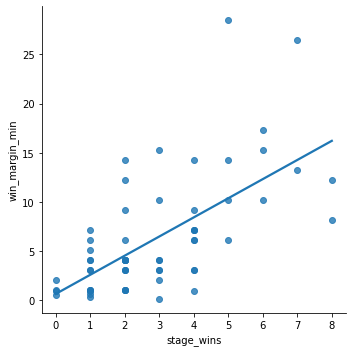

In [ ]:
sns.lmplot(x='stage_wins', y='win_margin_min', data=tdf_final, ci=None); 

In [ ]:
model_stage_wins = ols('win_margin_min ~ distance + C(stage_wins)', data = tdf_final).fit()
print(model_stage_wins.summary())

                            OLS Regression Results                            
Dep. Variable:         win_margin_min   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     11.29
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.28e-09
Time:                        18:12:37   Log-Likelihood:                -167.32
No. Observations:                  63   AIC:                             354.6
Df Residuals:                      53   BIC:                             376.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -15.9273      4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


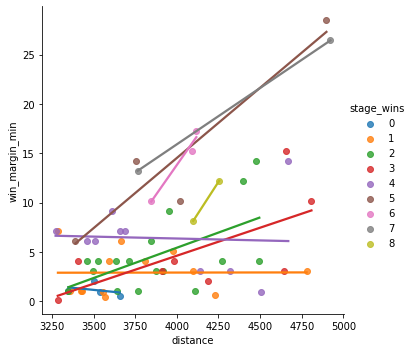

In [ ]:
sns.lmplot('distance','win_margin_min',hue='stage_wins',data=tdf_final,ci=None)

Looks like distance doesnt matter as much in stage wins categories 0,1, or 4. However, we don't have a lot of data points to go off of here...

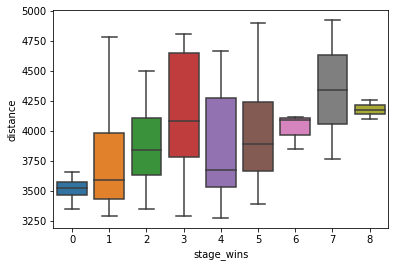

In [ ]:
sns.boxplot(x='stage_wins',y='distance',data=tdf_final)

In [ ]:
tdf_final['distance'].value_counts()

3349.0    2
3765.0    2
4779.0    1
3875.0    1
4274.0    1
         ..
4397.0    1
4188.0    1
4922.0    1
4476.0    1
4642.0    1
Name: distance, Length: 61, dtype: int64

In [ ]:
tdf_final['distance'].max()

4922.0

In [ ]:
tdf_final.tail()

,edition,year,winner_name,distance,time_overall,win_margin_min,stage_wins,stages_led,height,weight,age,nationality
101,102,2015,Chris Froome,3360.3,84.770556,1.016667,1,16,1.86,69.0,30,Great Britain
102,103,2016,Chris Froome,3529.0,89.080000,4.066667,2,14,1.86,69.0,31,Great Britain
103,104,2017,Chris Froome,3540.0,86.348611,0.900000,0,15,1.86,69.0,32,Great Britain
104,105,2018,Geraint Thomas,3349.0,83.286944,1.016667,2,11,1.83,71.0,32,Great Britain
105,106,2019,Egan Bernal,3349.0,82.950000,1.016667,0,2,1.75,60.0,22,Colombia


In [ ]:
tdf_final['height'].max()

1.9

In [ ]:
tdf_final['height'].min()

1.61

In [ ]:
tdf_final['height'].mean()

1.782222222222222